In [1]:
import pandas as pd
cars = pd.read_csv("imports-85.data", 
                   names = ['symboling', 'normalized_losses', 
                              'make', 'fuel_type', 'aspiration',
                             'num_doors', 'body_style', 'drive_wheels',
                             'engine_location', 'wheel_base', 'length',
                             'width', 'height', 'curb_weight', 'engine_type',
                             'num_cylinders', 'engine_size', 'fuel_system',
                             'bore', 'stroke', 'compression_ratio', 
                              'horsepower', 'peak_rpm', 'city_mpg',
                              'highway_mpg', 'price'])

In [2]:
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Target column = price
Numeric columns = normalised_losses, wheel_base, length, width, height, curb-weight, engine_size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg
Feature columns = symboling, make, fuel_type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system

In [3]:
import numpy as np
cars = cars.replace("?", np.nan)

In [4]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
cars['normalized_losses'] = cars['normalized_losses'].astype(float)
cars['bore'] = cars['bore'].astype(float)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float)
cars['peak_rpm'] = cars['peak_rpm'].astype(float)
cars['price'] = cars['price'].astype(float)

In [6]:
cars['normalized_losses'].isnull().sum()

41

In [7]:
cars['normalized_losses'].value_counts()

161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
148.0     4
118.0     4
93.0      4
106.0     4
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized_losses, dtype: int64

In [8]:
cars['normalized_losses'].mean()

122.0

In [9]:
cars['normalized_losses'].shape[0]

205

Normalised losses:
total rows = 205
mean = 122 (4 occurences)
Mode = 161 (11 occurences)
empty values = 41

Look at what happens after removing rows with empty price first, maybe that will solve the problem

In [10]:
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [11]:
cars = cars.dropna(subset=['price', 'num_doors', 'bore', 'stroke',
                          'horsepower', 'peak_rpm'])
cars.isnull().sum()

symboling             0
normalized_losses    34
make                  0
fuel_type             0
aspiration            0
num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [12]:
cars.shape[0]

193

In [13]:
34/193

0.17616580310880828

In [14]:
cars['normalized_losses'].mean()

121.13207547169812

after visually inspecting the data, values for normalised losses are quite similar within makes. Take averages within and use assign

In [15]:
cars['make'].value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
subaru           12
mazda            12
volkswagen       12
peugot           11
volvo            11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [16]:
makes = ['toyota', 'nissan', 'mitsubishi', 'honda', 'volkswagen',
        'subaru', 'mazda', 'peugot', 'volvo', 'bmw', 'mercedes-benz',
        'dodge', 'plymouth', 'saab', 'audi', 'porsche', 'jaguar',
        'chevrolet', 'alfa-romero', 'isuzu', 'mercury']
make_averages = []
for make in makes:
    cars_make = cars[cars['make'] == make]
    make_average = cars_make['normalized_losses'].mean()
    report = make, " average is ", make_average
    make_averages.append(report)
    
make_averages

[('toyota', ' average is ', 110.29032258064517),
 ('nissan', ' average is ', 135.16666666666666),
 ('mitsubishi', ' average is ', 146.19999999999999),
 ('honda', ' average is ', 103.0),
 ('volkswagen', ' average is ', 121.25),
 ('subaru', ' average is ', 92.25),
 ('mazda', ' average is ', 114.45454545454545),
 ('peugot', ' average is ', 161.0),
 ('volvo', ' average is ', 91.454545454545453),
 ('bmw', ' average is ', 190.0),
 ('mercedes-benz', ' average is ', 102.8),
 ('dodge', ' average is ', 131.625),
 ('plymouth', ' average is ', 129.0),
 ('saab', ' average is ', 127.0),
 ('audi', ' average is ', 161.0),
 ('porsche', ' average is ', 186.0),
 ('jaguar', ' average is ', 145.0),
 ('chevrolet', ' average is ', 100.0),
 ('alfa-romero', ' average is ', nan),
 ('isuzu', ' average is ', nan),
 ('mercury', ' average is ', nan)]

for a bigger dataset, would deal with quicker but for here, can inspect and find 0 values with common characteristics

In [17]:
cars['norm_losses'] = cars['normalized_losses']

if cars.loc[(cars['normalized_losses'] == 0) &
            (cars['make'] == 'toyota')] is True:
    cars['norm_losses'] = 91

In [18]:
cars.tail(100)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,norm_losses
102,0,108.0,nissan,gas,std,four,wagon,fwd,front,100.4,...,mpfi,3.43,3.27,9.00,152.0,5200.0,17,22,14399.0,108.0
103,0,108.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.43,3.27,9.00,152.0,5200.0,19,25,13499.0,108.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,mpfi,3.43,3.27,9.00,160.0,5200.0,19,25,17199.0,194.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,mpfi,3.43,3.27,7.80,200.0,5200.0,17,23,19699.0,194.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,mpfi,3.43,3.27,9.00,160.0,5200.0,19,25,18399.0,231.0
107,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,3.19,8.40,97.0,5000.0,19,24,11900.0,161.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.00,95.0,4150.0,28,33,13200.0,161.0
109,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,mpfi,3.46,3.19,8.40,97.0,5000.0,19,24,12440.0,NaN
110,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.00,95.0,4150.0,25,25,13860.0,NaN
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,2.19,8.40,95.0,5000.0,19,24,15580.0,161.0


In [19]:
cars.set_value(181, 'normalized_losses', 91)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,norm_losses
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,164.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,NaN
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,158.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,NaN
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,158.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,192.0


In [20]:
cars.isnull().sum()

symboling             0
normalized_losses    33
make                  0
fuel_type             0
aspiration            0
num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
norm_losses          34
dtype: int64

In [21]:
pd.set_option('display.max_rows', 210)

In [22]:
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,norm_losses
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,164.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,NaN
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,158.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,NaN
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,158.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,192.0


In [23]:
#Audi - mean
cars.set_value(5, 'normalized_losses', 161)
cars.set_value(7, 'normalized_losses', 161)
#BMW - mean
cars.set_value(14, 'normalized_losses', 190)
cars.set_value(15, 'normalized_losses', 190)
cars.set_value(16, 'normalized_losses', 190)
cars.set_value(17, 'normalized_losses', 190)
#Isuzu - empty so use Honda average
cars.set_value(43, 'normalized_losses', 103)
cars.set_value(46, 'normalized_losses', 103)
#Jaguar - mean
cars.set_value(48, 'normalized_losses', 145)
cars.set_value(49, 'normalized_losses', 145)
#Mazda - based on average of other Mazda Sedans
cars.set_value(66, 'normalized_losses', 115)
#Mercedes-Benz - based on other MB gas cars
cars.set_value(71, 'normalized_losses', 142)
cars.set_value(73, 'normalized_losses', 142)
cars.set_value(74, 'normalized_losses', 142)

#Leave Mercury and just delete row after

#Mitsubishi - mean
cars.set_value(82, 'normalized_losses', 146)
cars.set_value(83, 'normalized_losses', 146)
cars.set_value(84, 'normalized_losses', 146)
#Peugeot - only 161
cars.set_value(113, 'normalized_losses', 161)
cars.set_value(114, 'normalized_losses', 161)
#plymouth - go same as other plymouth hatchback
cars.set_value(124, 'normalized_losses', 129)
#Porsche - only 186
cars.set_value(126, 'normalized_losses', 186)
cars.set_value(127, 'normalized_losses', 186)
cars.set_value(128, 'normalized_losses', 186)
#Volkswagen - one outlier excluded, mean used apart from this
cars.set_value(189, 'normalized_losses', 102)
cars.set_value(191, 'normalized_losses', 102)
cars.set_value(192, 'normalized_losses', 102)
cars.set_value(193, 'normalized_losses', 102)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,norm_losses
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,164.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,164.0
5,2,161.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,NaN
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,158.0
7,1,161.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,NaN
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,158.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,192.0


In [24]:
cars.isnull().sum()

symboling             0
normalized_losses     6
make                  0
fuel_type             0
aspiration            0
num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
norm_losses          34
dtype: int64

In [24]:
#Fix Peugeot
cars.set_value(109, 'normalized_losses', 161)
cars.set_value(110, 'normalized_losses', 161)
#Set Alfa to mean since nothing similar
cars.set_value(0, 'normalized_losses', cars['normalized_losses'].mean())
cars.set_value(1, 'normalized_losses', cars['normalized_losses'].mean())
cars.set_value(2, 'normalized_losses', cars['normalized_losses'].mean())

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,norm_losses
0,3,125.116402,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0,NaN
1,3,125.116402,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,NaN
2,1,125.116402,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,NaN
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,164.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,164.0
5,2,161.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,NaN
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,158.0
7,1,161.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,NaN
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,158.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,192.0


In [25]:
cars.drop('norm_losses', axis=1, inplace=True)

In [26]:
cars.isnull().sum()

symboling            0
normalized_losses    1
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [27]:
cars.dropna()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,125.116402,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,125.116402,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,125.116402,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,161.000000,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,161.000000,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
10,2,192.000000,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0


In [28]:
cars.isnull().sum()

symboling            0
normalized_losses    1
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [29]:
cars.shape

(193, 26)

In [30]:
cars = cars.dropna()
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Would be better to do this in more systematic way but for this dataset this was a good option

In [31]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [32]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [33]:
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.314746,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.314746,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.314746,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.502618,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.502618,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, test_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(numeric_cars.index)
    rand_df = numeric_cars.reindex(shuffled_index)
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train = df.iloc[:last_train_row]
    test = df.iloc[last_train_row:]
    # Fit a KNN model using default k value.
    knn.fit(train[[train_col]], train[test_col])
    # Make predictions using model.
    prediction = knn.predict(test[[train_col]])
    # Calculate and return RMSE.
    rmse = mean_squared_error(test[test_col], prediction)**(1/2)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

  
    
    

horsepower            3839.954781
highway_mpg           4155.838978
city_mpg              4169.283362
curb_weight           4899.810228
width                 6697.529569
normalized_losses     7909.658688
length                8182.654400
compression_ratio     8590.368155
wheel_base            9962.643377
peak_rpm             10097.328216
stroke               10244.206756
height               10965.450413
bore                 14029.896603
dtype: float64

In [35]:
#Add K value

In [36]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 7569.9870101165525,
  3: 7523.3117711408877,
  5: 7089.534229176601,
  7: 7103.1615969963841,
  9: 7199.903227141006},
 'city_mpg': {1: 4651.7412611211157,
  3: 3575.610170830987,
  5: 4057.5203639866886,
  7: 4362.061542835726,
  9: 4694.5555202314954},
 'compression_ratio': {1: 8175.016489534848,
  3: 6437.7165488568953,
  5: 6203.2588274564741,
  7: 6765.2851633947639,
  9: 7142.9772125927539},
 'curb_weight': {1: 5526.1603259330677,
  3: 4349.5675086991669,
  5: 4022.104733894515,
  7: 4543.2829598371109,
  9: 4881.1144649040834},
 'height': {1: 11622.848817541104,
  3: 8227.0431847448945,
  5: 8138.4337584595069,
  7: 8119.8392377442569,
  9: 8362.2505889363074},
 'highway_mpg': {1: 4970.6296717149762,
  3: 4261.2846369310328,
  5: 4707.639060700526,
  7: 5013.1009031515187,
  9: 5047.5179740063004},
 'horsepower': {1: 4315.4990525913299,
  3: 4106.5004212213034,
  5: 4672.2799457723713,
  7: 5071.0219250742084,
  9: 5136.5468762945593},
 'length': {1: 6378.7531100978

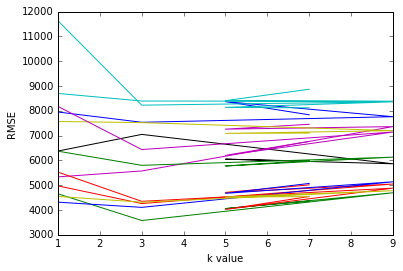

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [38]:

# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

city_mpg             4268.297772
width                4541.702543
horsepower           4660.369644
curb_weight          4664.445999
highway_mpg          4800.034449
wheel_base           6013.188057
length               6262.300434
normalized_losses    6597.579764
compression_ratio    6944.850848
bore                 7297.179567
peak_rpm             7891.798424
stroke               8550.768520
height               8894.083117
dtype: float64

In [39]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3788.7714467665287},
 'four best features': {5: 3656.7075725644236},
 'six best features': {5: 3781.3359611165652},
 'three best features': {5: 3616.4730559736422},
 'two best features': {5: 3989.7816590740067}}

In [41]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2729.3028509279311,
  2: 3025.0444276179646,
  3: 3135.6094387029984,
  4: 3444.7781035855865,
  5: 3788.7714467665287,
  6: 3965.4618008475991,
  7: 4126.482637667471,
  8: 4329.2692674745331,
  9: 4469.9618946513147,
  10: 4594.5816927387423,
  11: 4675.2587740231638,
  12: 4834.3637850159612,
  13: 4911.6796074394542,
  14: 5050.2283407208915,
  15: 5170.8479470426491,
  16: 5194.5790261493885,
  17: 5292.2059027136438,
  18: 5316.413110811498,
  19: 5351.3917908956437,
  20: 5362.1116230814723,
  21: 5358.2622118802819,
  22: 5391.256579917409,
  23: 5418.4451042242126,
  24: 5444.2503452055707},
 'four best features': {1: 2529.6126206232975,
  2: 2940.0014154616774,
  3: 3159.1545004015566,
  4: 3268.0823499559724,
  5: 3656.7075725644236,
  6: 3862.8681909043862,
  7: 4164.2308556890539,
  8: 4282.7184969884038,
  9: 4532.5581820436801,
  10: 4631.6383026711874,
  11: 4676.4958169403808,
  12: 4829.6809433556036,
  13: 4959.0349410046047,
  14: 5045.371

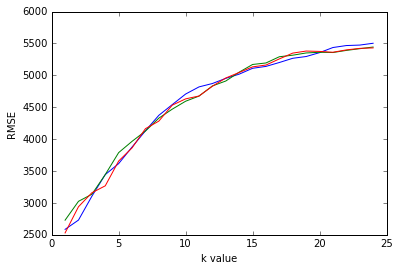

In [42]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')